In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

def load_csv(path, cols):
    df = pd.read_csv(path, names=cols)
    # coerce round to int if present
    if "round" in df.columns:
        df["round"] = pd.to_numeric(df["round"], errors="coerce").astype("Int64")
        df = df.dropna(subset=["round"]).astype({"round":"int64"})
        df = df.sort_values("round")
    return df

Found: ['client_1_metrics.csv', 'client_2_metrics.csv', 'client_3_metrics.csv']


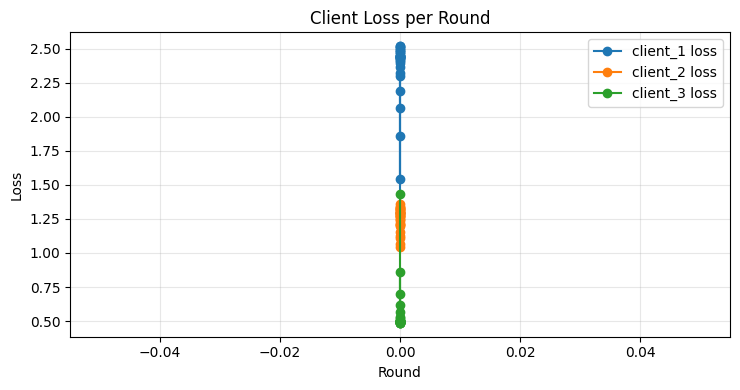

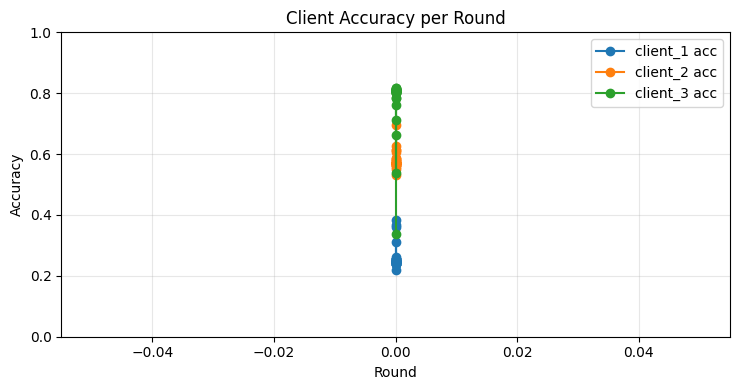

In [7]:
paths = sorted(glob.glob("results/client_*_metrics.csv"))
print("Found:", [os.path.basename(p) for p in paths])

plt.figure(figsize=(7.5,4))
for p in paths:
    df = load_csv(p, ["round","loss","acc"])
    lbl = os.path.basename(p).replace("_metrics.csv","")
    plt.plot(df["round"], df["loss"], marker="o", label=f"{lbl} loss")
plt.title("Client Loss per Round")
plt.xlabel("Round"); plt.ylabel("Loss"); plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(7.5,4))
for p in paths:
    df = load_csv(p, ["round","loss","acc"])
    lbl = os.path.basename(p).replace("_metrics.csv","")
    plt.plot(df["round"], df["acc"], marker="o", label=f"{lbl} acc")
plt.title("Client Accuracy per Round")
plt.xlabel("Round"); plt.ylabel("Accuracy"); plt.ylim(0,1); plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout(); plt.show()

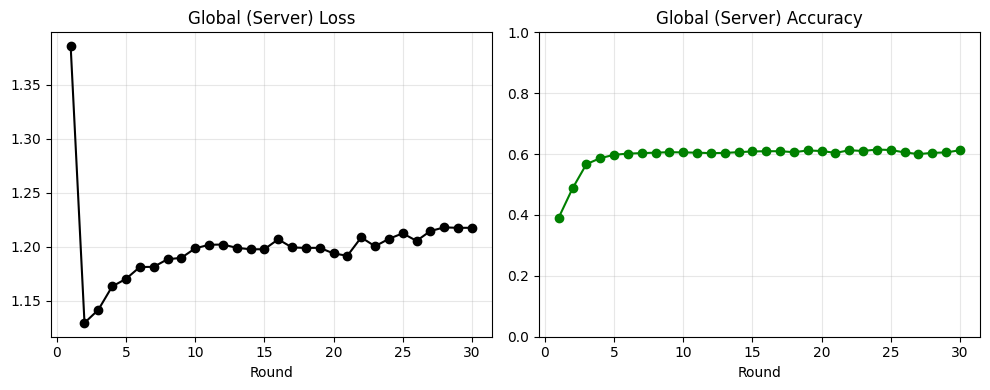

In [8]:
sv = load_csv("results/server_metrics.csv", ["round","loss","acc"])
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(sv["round"], sv["loss"], marker="o", c="k")
ax[0].set_title("Global (Server) Loss"); ax[0].set_xlabel("Round"); ax[0].grid(True, alpha=.3)
ax[1].plot(sv["round"], sv["acc"], marker="o", c="g")
ax[1].set_title("Global (Server) Accuracy"); ax[1].set_xlabel("Round"); ax[1].set_ylim(0,1); ax[1].grid(True, alpha=.3)
plt.tight_layout(); plt.show()

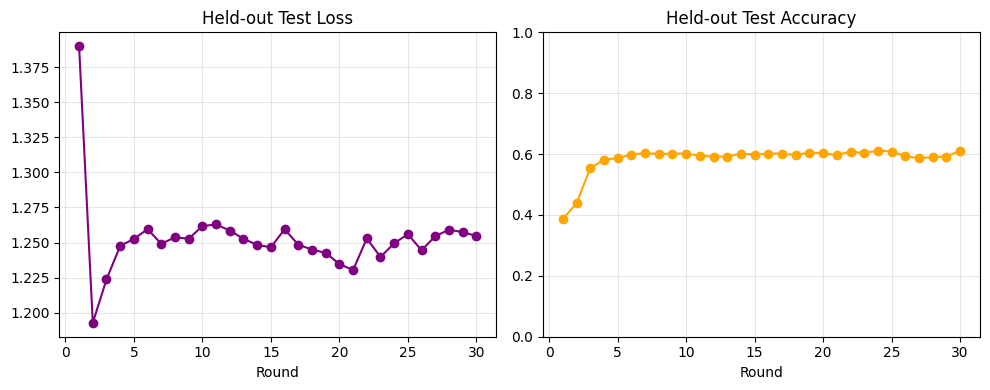

In [12]:
# Load test metrics
test_df = pd.read_csv("results/test_metrics.csv", header=None, names=["round","loss","accuracy"])

# Override round numbers with sequence (1, 2, 3, …)
test_df["round"] = range(1, len(test_df)+1)

# Plot loss and accuracy side by side
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(test_df["round"], test_df["loss"], marker="o", c="purple")
ax[0].set_title("Held-out Test Loss")
ax[0].set_xlabel("Round")
ax[0].grid(True, alpha=.3)

ax[1].plot(test_df["round"], test_df["accuracy"], marker="o", c="orange")
ax[1].set_title("Held-out Test Accuracy")
ax[1].set_xlabel("Round")
ax[1].set_ylim(0,1)
ax[1].grid(True, alpha=.3)

plt.tight_layout()
plt.show()

In [10]:
plt.savefig("results/plot_name.png", dpi=200, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

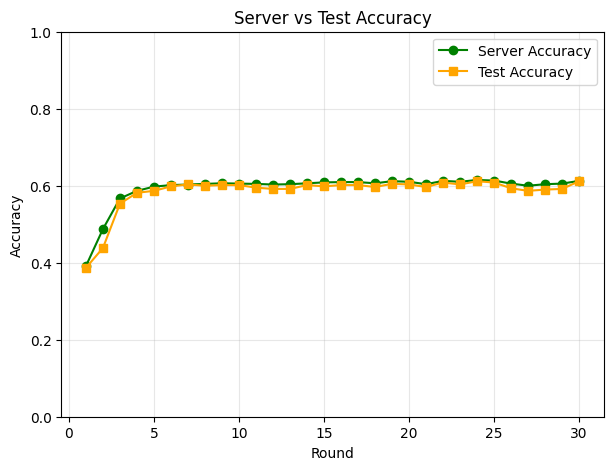

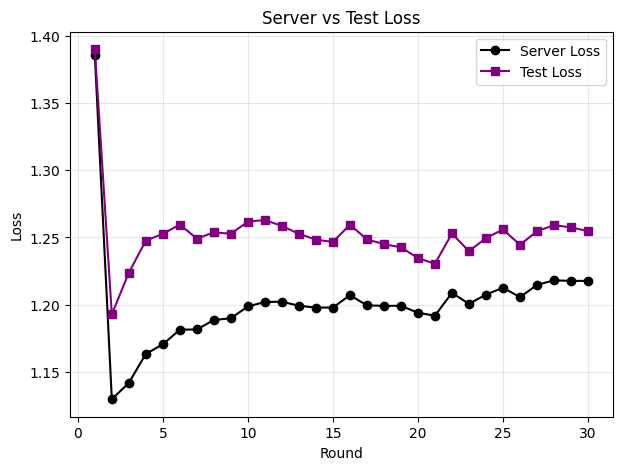

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load server results
server_df = pd.read_csv("results/server_metrics.csv", header=None, names=["round","loss","accuracy"])

# Load test results
test_df = pd.read_csv("results/test_metrics.csv", header=None, names=["round","loss","accuracy"])
test_df["round"] = range(1, len(test_df)+1)   # fix round numbering

# --- Plot Accuracy ---
plt.figure(figsize=(7,5))
plt.plot(server_df["round"], server_df["accuracy"], marker="o", c="green", label="Server Accuracy")
plt.plot(test_df["round"], test_df["accuracy"], marker="s", c="orange", label="Test Accuracy")
plt.title("Server vs Test Accuracy")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True, alpha=.3)
plt.legend()
plt.show()

# --- Plot Loss ---
plt.figure(figsize=(7,5))
plt.plot(server_df["round"], server_df["loss"], marker="o", c="black", label="Server Loss")
plt.plot(test_df["round"], test_df["loss"], marker="s", c="purple", label="Test Loss")
plt.title("Server vs Test Loss")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.grid(True, alpha=.3)
plt.legend()
plt.show()